# The Affects of COVID-19 Lockdown on Air Pollution in LA County 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Aaron Chen
- Cathleen Pena
- Ian Rebmann
- Sandra Villamar

# Group Members IDs

- A15490376
- A15112037
- A16102000
- A14356262

# Research Question

Has the air quality—in particular, the level of CO, NO2, O3, or pm2.5—changed in Los Angeles County since the COVID-19 lockdown regulations were in place? How did it change? Can we conclude that the COVID-19 lockdown is a reasonable guess for this change? Or are there other factors such as weather that may have contributed to a change in the air pollution?

# Background and Prior Work

Our group decided to choose a question related to COVID-19 because we felt that this pandemic is by far the most prevalent factor that has significantly changed our daily lives in the past weeks. In addition, we wanted to incorporate our other interest with environment-related topics. Therefore, we discussed in what ways the COVID-19 lockdown has affected our normal activities and noticed that the lockdown could have an impact on the level of air pollution. We wanted to see if there is a change in air pollution and if so, how significant this change is. We specifically chose Los Angeles County because we wanted to choose an area in California that is known to have poor air quality as well as an area with a big population, since our findings could then be relevant to a greater audience.  

This question is important to ask because improving air quality has proven to be a prominent topic that has consistently shown up in nationwide as well as worldwide discussions. In the United States alone, “the cost of poor air quality to the U.S. from air pollution related illness has been estimated at $150 billion per year [1].” This is because poor air quality leads to several respiratory and cardiovascular health problems, affecting individuals as well as entire communities. Moreover, sensitive ecosystems can and have been damaged as well. That being said, if the lockdown has indeed contributed to an improvement in air quality, then LA County (as well as other counties) could continue to restrict certain activities that are possible in a remote setting. On the other hand, if the lockdown has not contributed to a significant change in air pollution, then we will know to focus on other possible sources in search for finding a solution for better air quality. 

While searching for our topic, we came across a data science project that studied the change in air pollution in Lombardy, Italy, comparing current COVID-19 lockdown dates to previous years [2]. The data scientists explored air quality data from NO2, Benzene, SO2, pm2.5, and pm10, across the years 2018, 2019, and 2020. They discovered a significant drop in some pollutants and no change in others. They also looked at other natural factors that are known to affect air quality such as wind, temperature, and precipitation, to see how they changed in relation to the decrease of some pollutant levels. They considered these weather factors because sunshine and heat cause pollutants to undergo chemical reactions faster, contributing to the development of smog. On the other hand, rain and wind help wash away pollutants or spread them out from a particular area, which typically results in improved air quality [3]. Nonetheless, after this analysis, they concluded that the intensity of human activity is the only factor that significantly changed throughout the years and is hence a reasonable guess to why the air quality improved in Lombardy, Italy.  

Another study posted to the *World Economic Forum* found that some of the world's most polluted cities have seen a large improvement in air quality [4]. In order to show this, the scientists plotted levels of various pollutants in India, China, and South Korea. They also displayed satellite images of these locations taken before and during the COVID-19 lockdown. Both of these visualizations demonstrated how drastic the change in air quality was in these regions, after just a few weeks of lockdown regulations.

**References:**
- [1] https://www.weather.gov/sti/stimodeling_airquality_background
- [2] https://towardsdatascience.com/is-covid-19-lockdown-cleaning-the-skies-over-milan-42dbba1ec812
- [3] https://www.weather.gov/wrn/summer-article-clearing-the-air
- [4] https://www.weforum.org/agenda/2020/04/coronavirus-covid19-air-pollution-enviroment-nature-lockdown

# Hypothesis

We hypothesize that all four pollutants have significantly reduced in level in Los Angeles County due to the COVID-19 lockdown. We believe this because activities such as transportation and manufacturing have notably decreased due to the restrictions of the lockdown. These are all known sources that contribute to air pollution.

# Datasets

#### Dataset #1
- Dataset Name: Los Angeles Downtown Weather 
- [Link to Weather Dataset!](https://www.ncdc.noaa.gov/cdo-web/confirmation)
- Number of observations: 855
- Description: This dataset contains information on the weather in downtown Los Angeles. It contains the station ID and name, the date the data was collected, and the average windspeed, precipitation, and maximum and minimum temperature for that day. Station and Name are nominal data, date is ordinal data, and the rest of the data are numerical. We will be using this dataset to see if there were any significant weather changes that could correlate to a possible change in pollutant levels during the COVID-19 lockdown.

#### Dataset #2
- Dataset Name: Los Angeles North Main Street Air Quality 
- [Link to Air Quaility Dataset!](https://aqicn.org/city/los-angeles/)
- Number of observations: 2311
- Description: This dataset contains information on the pollutant levels for each day in downtown Los Angeles. It contains the date the data was collected as well as the AQI (air quality index) level for the pollutants pm2.5, pm10, O3, NO2, SO2, and CO. Date is ordinal data and the pollutant levels are numerical data. We will use this dataset to find out if there is a relationship between air pollution and lockdown regulations.

#### Other:
For point of reference, we got the lockdown dates and other information [HERE!](https://www.gov.ca.gov/california-takes-action-to-combat-covid-19/)

# Setup

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import scipy as sp
from scipy.interpolate import spline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data Cleaning

### Load  and Clean Datasets:

In [2]:
dfw = pd.read_csv("Los_Angeles_Downtown_Weather.csv")
dfaqi = pd.read_csv("Los_Angeles_North_Main_Street_Air_Quality.csv")
display(dfw.head(3))
display(dfaqi.head(3))

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/1/2018,0.22,0.0,71,47
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/2/2018,0.67,0.0,78,52
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",1/3/2018,0.22,0.0,74,53


,date,pm25,pm10,o3,no2,so2,co
0,5/2/2020,55,29,34,9,,2
1,5/3/2020,48,22,27,6,1,2
2,5/4/2020,37,34,39,12,1,3


#### Rename and Drop Unnecessary Columns:

In [3]:
dfw = dfw.drop(columns=['NAME','STATION'])
dfw.columns = ['date', 'average wind speed', 'precipitation', 'max temp', 'min temp']
dfaqi.columns = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
dfaqi = dfaqi.drop(columns=['pm10', 'so2'])

#### Filter Data from 2018 until 2020:

In [4]:
dfw['date'] = pd.to_datetime(dfw['date'], errors='coerce')
dfaqi['date'] = pd.to_datetime(dfaqi['date'], errors='coerce')

dfw = dfw.sort_values(by='date').reset_index(drop=True).drop_duplicates()
dfaqi = dfaqi.sort_values(by='date').reset_index(drop=True).drop_duplicates()

#start dfaqi at Jan 1, 2018
dfaqi = dfaqi[dfaqi['date'].dt.year >= 2018]
              
#end dfaqi at May 8, 2020    
#drop last date: 2020-05-09 since 3/4 pollutants are missing values for this day
dfaqi = dfaqi.drop(dfaqi.tail(1).index)
dfaqi.tail()

,date,pm25,o3,no2,co
2305,2020-05-04,37,39,12,3
2306,2020-05-05,56,47,17,4
2307,2020-05-06,57,52,21,4
2308,2020-05-07,55,64,20,4
2309,2020-05-08,59,25,25,6


#### Check Missing Entries:

In [5]:
dfaqi[(dfaqi['pm25'] == ' ')]

,date,pm25,o3,no2,co
1817,2019-01-01,,25,20,6
2080,2019-09-21,,53,17,5
2081,2019-09-22,,50,18,6
2082,2019-09-23,,37,16,4
2083,2019-09-24,,30,20,6
2084,2019-09-25,,38,16,3
2181,2020-01-01,,25,19,5
2276,2020-04-05,,21,2,1
2277,2020-04-06,,27,5,1
2278,2020-04-07,,23,9,2


In [6]:
dfaqi[(dfaqi['o3'] == ' ')]

,date,pm25,o3,no2,co
1516,2018-03-06,31,,26,12
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [7]:
dfaqi[(dfaqi['no2'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2180,2019-12-30,56,,,


In [8]:
dfaqi[(dfaqi['co'] == ' ')]

,date,pm25,o3,no2,co
1816,2018-12-31,53,,,
2164,2019-12-14,85,9,21,
2165,2019-12-15,79,29,11,
2166,2019-12-16,25,20,26,
2167,2019-12-17,31,22,26,
2170,2019-12-20,55,18,29,
2180,2019-12-30,56,,,


#### Fix Missing Entries:

Since there are only a handful of missing entries and they are missing at random, we decided that the missing values will not greatly perturb our results or contribute to any substantial biases. We replace these missing values by the integer 0 (since no other entry in the dataset has a 0 entry), and make note of these missing values when we continue on to our visualizations and analyses.

In [9]:
#replace missing values by 0
dfaqi = dfaqi.replace(' ', '0')

#### Check  and Fix Data Types:

In [10]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25            object
o3              object
no2             object
co              object
dtype: object


In [11]:
dfaqi = dfaqi.astype({'pm25': 'int32', 'o3': 'int32', 'no2': 'int32', 'co': 'int32'})

In [12]:
print(dfw.dtypes)
print()
print(dfaqi.dtypes)

date                  datetime64[ns]
average wind speed           float64
precipitation                float64
max temp                       int64
min temp                       int64
dtype: object

date    datetime64[ns]
pm25             int32
o3               int32
no2              int32
co               int32
dtype: object


#### Separate Data by Years:

In [13]:
dfw2018=dfw[dfw['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfw2019=dfw[dfw['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfw2020=dfw[dfw['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

In [14]:
dfaqi2018=dfaqi[dfaqi['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019=dfaqi[dfaqi['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020=dfaqi[dfaqi['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#### Summary:
The data have been checked for missing values, converted into the correct types, filtered to include the relevant dates, and placed under the correct column names. Now that the data are clean, we move on to visualizing and analyzing!

# Data Analysis & Results

### Line Graphs of Pollution Levels in 2018, 2019, 2020:
We create line graphs in order to visualize the pollutant levels over the first phase lockdown time period (March 19th to May 8th). We use this time period for 2018, 2019, and 2020, so that we can clearly compare and see any possible differences in pollution between the years.

#### Line Graph for pm2.5:

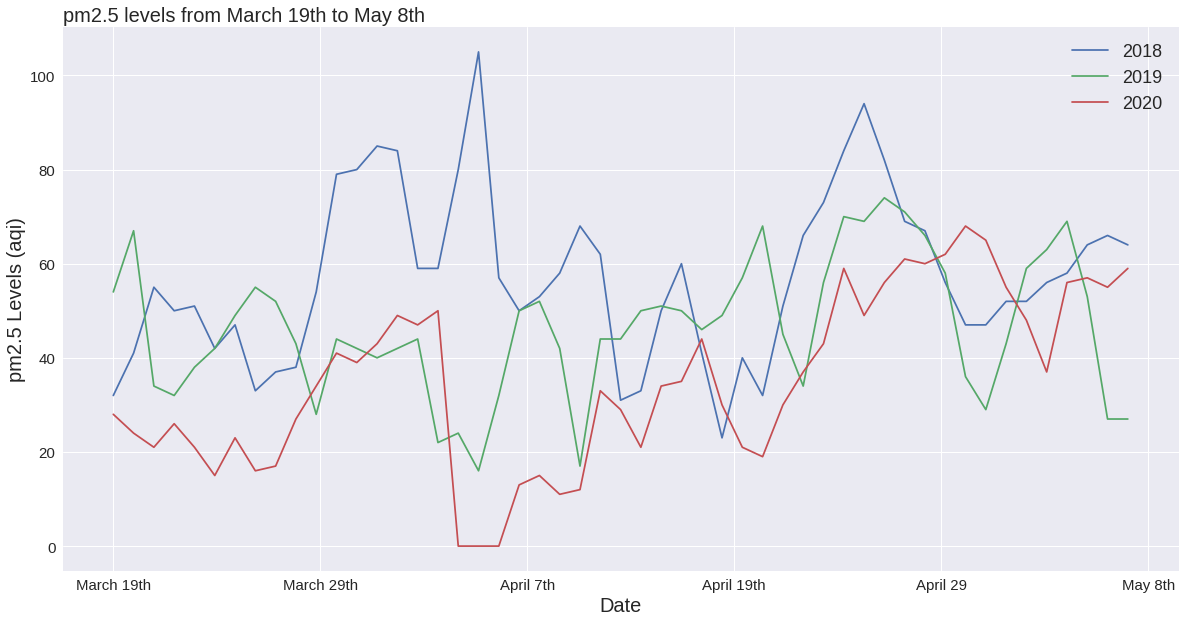

In [15]:
#only use dates from March 19 to May 8
lockdown_dates_2018 = (dfaqi['date'] >= '2018-3-19') & (dfaqi['date'] <= '2018-5-8')
lockdown_dates_2019 = (dfaqi['date'] >= '2019-3-19') & (dfaqi['date'] <= '2019-5-8')
lockdown_dates_2020 = (dfaqi['date'] >= '2020-3-19') & (dfaqi['date'] <= '2020-5-8')

#create dataframe for pm25 during lockdown dates
df_pm25_lockdown = dfaqi.loc[:,['date', 'pm25']]
df_pm25_lockdown = df_pm25_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_pm25_lockdown[df_pm25_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['pm25'],label=2018)
plt.plot(dfaqi2019Q['pm25'],label=2019)
plt.plot(dfaqi2020Q['pm25'],label=2020)

plt.title("pm2.5 levels from March 19th to May 8th", fontsize=20, loc='left')
plt.xlabel('Date', fontsize=20)
plt.ylabel('pm2.5 Levels (aqi)', fontsize=20)

#Get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS GRAPH!!!

#### Line Graph for O3:

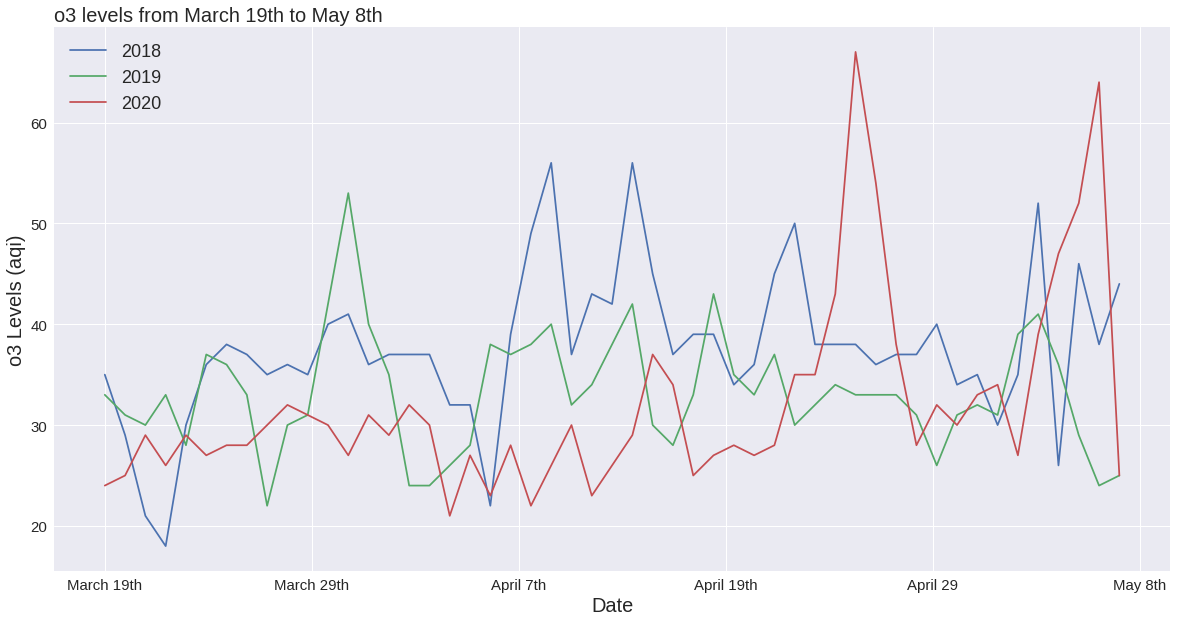

In [16]:
#create dataframe for o3 during lockdown dates
df_o3_lockdown = dfaqi.loc[:,['date', 'o3']]
df_o3_lockdown = df_o3_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_o3_lockdown[df_o3_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['o3'],label=2018)
plt.plot(dfaqi2019Q['o3'],label=2019)
plt.plot(dfaqi2020Q['o3'],label=2020)

plt.title("o3 levels from March 19th to May 8th", fontsize=20, loc='left')
plt.xlabel('Date', fontsize=20)
plt.ylabel('o3 Levels (aqi)', fontsize=20)

#Get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS GRAPH!!!

#### Line Graph for NO2:

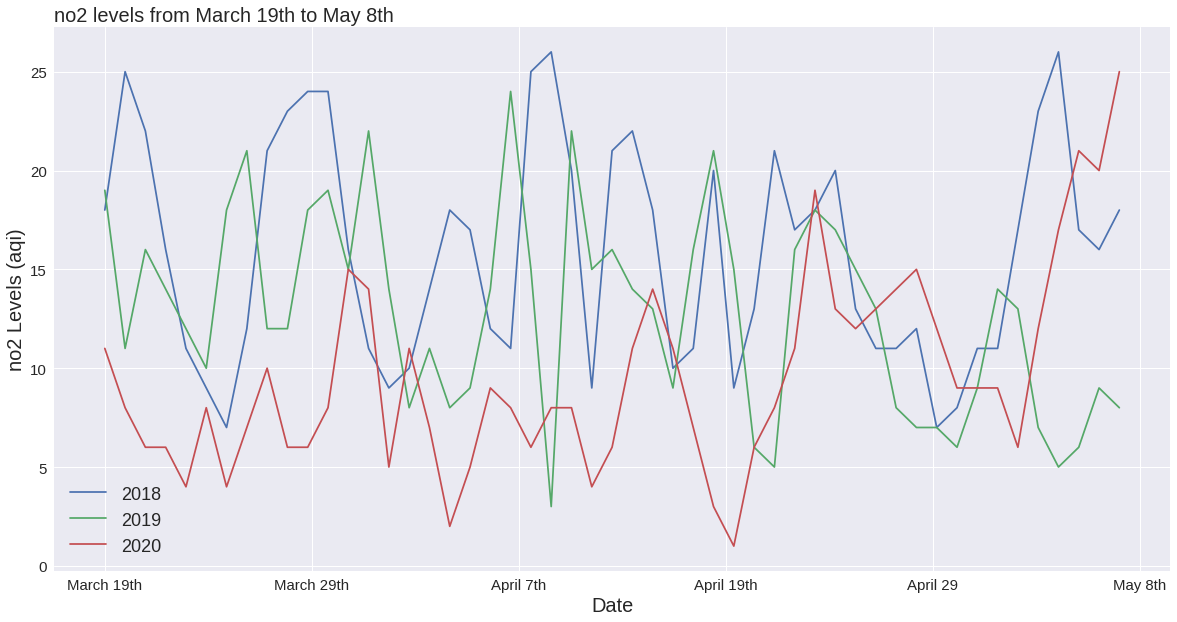

In [17]:
#create dataframe for no2 during lockdown dates
df_no2_lockdown = dfaqi.loc[:,['date', 'no2']]
df_no2_lockdown = df_no2_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_no2_lockdown[df_no2_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['no2'],label=2018)
plt.plot(dfaqi2019Q['no2'],label=2019)
plt.plot(dfaqi2020Q['no2'],label=2020)

plt.title("no2 levels from March 19th to May 8th", fontsize=20, loc='left')
plt.xlabel('Date', fontsize=20)
plt.ylabel('no2 Levels (aqi)', fontsize=20)

#Get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS GRAPH!!!

#### Line Graph for CO:

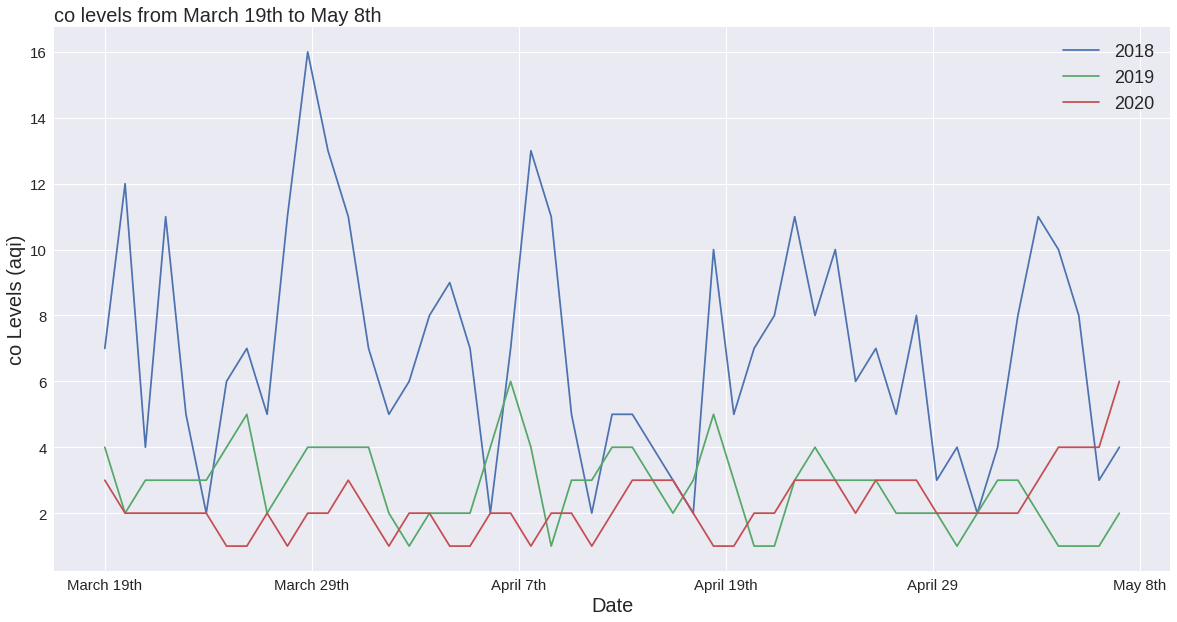

In [18]:
#create dataframe for co during lockdown dates
df_co_lockdown = dfaqi.loc[:,['date', 'co']]
df_co_lockdown = df_co_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]

dfaqi2018Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2018].sort_values(by='date').reset_index(drop=True)
dfaqi2019Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2019].sort_values(by='date').reset_index(drop=True)
dfaqi2020Q=df_co_lockdown[df_co_lockdown['date'].dt.year == 2020].sort_values(by='date').reset_index(drop=True)

#Makes plot larger
fig = plt.figure(figsize=(20,10))
#Changes style of plot
plt.style.use('seaborn')

plt.plot(dfaqi2018Q['co'],label=2018)
plt.plot(dfaqi2019Q['co'],label=2019)
plt.plot(dfaqi2020Q['co'],label=2020)

plt.title("co levels from March 19th to May 8th", fontsize=20, loc='left')
plt.xlabel('Date', fontsize=20)
plt.ylabel('co Levels (aqi)', fontsize=20)

#Get months on x axis
plt.xticks([0,10.2,20.4,30.6,40.8,51], ["March 19th", "March 29th", "April 7th", "April 19th", "April 29", "May 8th"], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS GRAPH!!!

### Correlation heatmaps of measures:

Because we know from prior research that weather factors affect pollution levels, we would like to see which of those factors have significantly high correlations. This way, we can check if during the 2020 lockdown time period, there was a significant change in those highly correlated weather factors. This is important because a change in weather may be the reason for a change in pollution levels, instead of the lockdown regulations themselves.

In [19]:
dfw.corr()

,average wind speed,precipitation,max temp,min temp
average wind speed,1.000000,0.395229,-0.290949,-0.028904
precipitation,0.395229,1.000000,-0.302606,-0.129266
max temp,-0.290949,-0.302606,1.000000,0.740979
min temp,-0.028904,-0.129266,0.740979,1.000000


In [20]:
dfaqi.corr()

,pm25,o3,no2,co
pm25,1.000000,0.208443,0.159160,0.331157
o3,0.208443,1.000000,-0.264063,-0.149338
no2,0.159160,-0.264063,1.000000,0.702398
co,0.331157,-0.149338,0.702398,1.000000


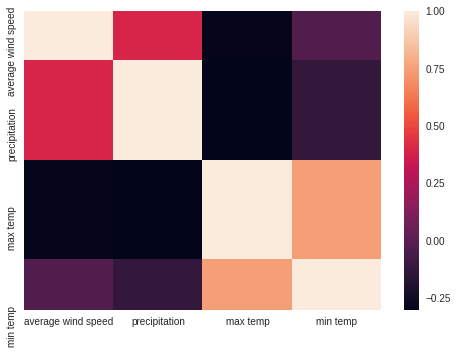

In [21]:
correlation_heatmap_2 = sns.heatmap(dfw.corr(), annot=False)
correlation_heatmap_2

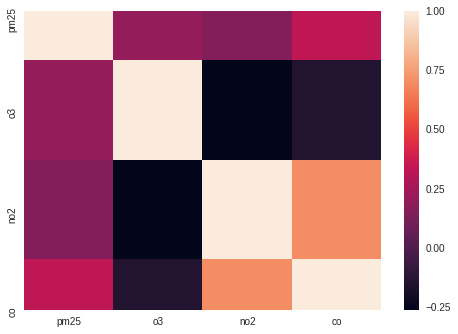

In [22]:
correlation_heatmap_3 = sns.heatmap(dfaqi.corr(), annot=False)
correlation_heatmap_3

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

### Weather Line Graphs (Ian's Part put in here!):

### Boxplots of Pollution Levels through 2018, 2019, and 2020:

These boxplots display the AQI levels of each pollutant. We will use the same timeframe of the first phase lockdown dates of 2020 (March 19th to May 8th), throughout 2018 and 2019 as well. This way, we can compare the air quality during the lockdown in 2020 to previous years' air quality.

#### Boxplot for pm2.5:

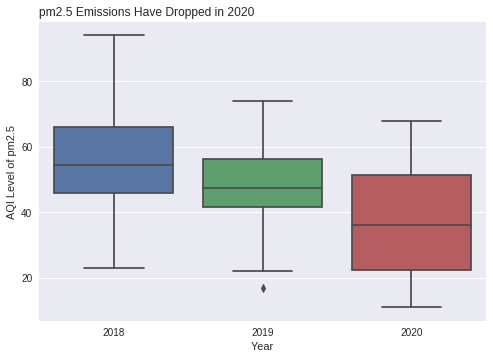

In [23]:
#only use dates from March 19 to May 8
lockdown_dates_2018 = (dfaqi['date'] >= '2018-3-19') & (dfaqi['date'] <= '2018-5-8')
lockdown_dates_2019 = (dfaqi['date'] >= '2019-3-19') & (dfaqi['date'] <= '2019-5-8')
lockdown_dates_2020 = (dfaqi['date'] >= '2020-3-19') & (dfaqi['date'] <= '2020-5-8')

#create dataframe for pm25 during lockdown dates
df_pm25_lockdown = dfaqi.loc[:,['date', 'pm25']]
df_pm25_lockdown = df_pm25_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#drop rows from each year if at least one year has a missing value
pm25_dates_missing = ['2018-04-05', '2018-04-06', '2018-04-07', '2019-04-05', '2019-04-06', '2019-04-07',
                     '2020-04-05', '2020-04-06', '2020-04-07']
df_pm25_lockdown = df_pm25_lockdown[~df_pm25_lockdown['date'].isin(pm25_dates_missing)]
#add year column
df_pm25_lockdown['year'] = df_pm25_lockdown['date'].dt.year

#set up color palette
years = df_pm25_lockdown['year'].unique()
palette = dict(zip(years, sns.color_palette()))

#generate boxplots
ax = sns.boxplot(x='year', y='pm25', data=df_pm25_lockdown, palette=palette)
ax.set_title('pm2.5 Emissions Have Dropped in 2020', loc='left')
ax.set_ylabel('AQI Level of pm2.5')
ax.set_xlabel('Year');

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!


#### Boxplot for O3:

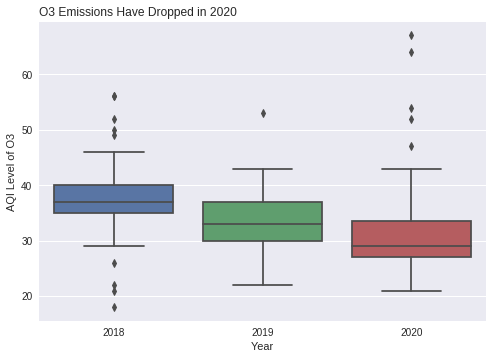

In [24]:
#create dataframe for o3 during lockdown dates
df_o3_lockdown = dfaqi.loc[:,['date', 'o3']]
df_o3_lockdown = df_o3_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_o3_lockdown['year'] = df_o3_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='o3', data=df_o3_lockdown, palette=palette)
ax.set_title('O3 Emissions Have Dropped in 2020', loc='left')
ax.set_ylabel('AQI Level of O3')
ax.set_xlabel('Year');

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

#### Boxplot for NO2:

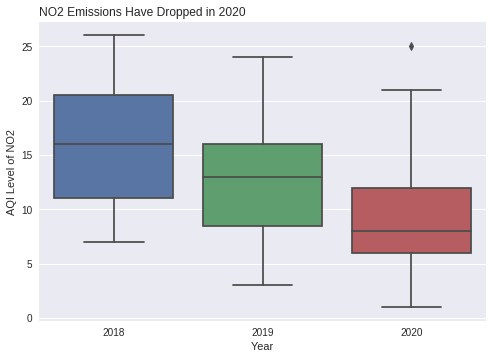

In [25]:
#create dataframe for no2 during lockdown dates
df_no2_lockdown = dfaqi.loc[:,['date', 'no2']]
df_no2_lockdown = df_no2_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_no2_lockdown['year'] = df_no2_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='no2', data=df_no2_lockdown, palette=palette)
ax.set_title('NO2 Emissions Have Dropped in 2020', loc='left')
ax.set_ylabel('AQI Level of NO2')
ax.set_xlabel('Year');

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

#### Boxplot for CO:

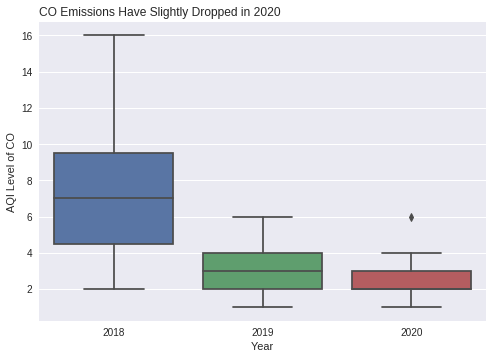

In [26]:
#create dataframe for co during lockdown dates
df_co_lockdown = dfaqi.loc[:,['date', 'co']]
df_co_lockdown = df_co_lockdown.loc[lockdown_dates_2018 | lockdown_dates_2019 | lockdown_dates_2020]
#no rows with missing data from any year: check!
#add year column
df_co_lockdown['year'] = df_co_lockdown['date'].dt.year

#generate boxplots
ax = sns.boxplot(x='year', y='co', data=df_co_lockdown, palette=palette)
ax.set_title('CO Emissions Have Slightly Dropped in 2020', loc='left')
ax.set_ylabel('AQI Level of CO')
ax.set_xlabel('Year');

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

### ANOVA Test for Change in Pollutant Levels:

For each pollutant, we will run an ANOVA Test to find out if there is a significant difference in the means of the pollutant levels during the lockdown time period in 2018, 2019, and 2020. 

#### Check Assumptions of ANOVA for pm2.5:
- Residuals are normally distributed
- Homogeneity of variances
- Observation are sampled independently from each another (True)

In [27]:
#get model
model = ols('pm25 ~ C(year)', data=df_pm25_lockdown).fit()

#use Shapiro-Wilk test to check normal distribution of residuals
#null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")

0.982723593711853 0.0667412206530571
Fail to reject null hypothesis. Residuals are normally distributed.


In [28]:
#separate data into years
pm25_2018 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2018]['pm25']
pm25_2019 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2019]['pm25']
pm25_2020 = df_pm25_lockdown[df_pm25_lockdown['year'] == 2020]['pm25']

#use Bartlett test to check homogeneity of variances
#null hypothesis: samples from populations have equal variances
w, pvalue = sp.stats.bartlett(pm25_2018, pm25_2019, pm25_2020)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Variances are equal.")

1.9596111644109846 0.375384073101009
Fail to reject null hypothesis. Variances are equal.


#### Assumptions passed. Now perform test for pm2.5:

In [29]:
#get ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(year),8120.055556,2.0,16.5639,3.457367e-07
Residual,34560.937500,141.0,NaN,NaN


The p-value we get from the ANOVA test is significant (P<.01) so we can conclude that there are significant differences among the years. To know the pairs of significant different years, we will perform multiple pairwise comparison (post-hoc comparison) analysis using Tukey HSD test.

In [30]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_pm25_lockdown['pm25'], groups=df_pm25_lockdown['year'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
 2018   2019   -7.875  -15.4455 -0.3045   True 
 2018   2020  -18.3333 -25.9038 -10.7628  True 
 2019   2020  -10.4583 -18.0288 -2.8878   True 
-----------------------------------------------


Above results from Tukey HSD suggest that all pairwise comparisons for years reject the null hypothesis and indicate statistical significant differences. **In particular, the 2020 lockdown period has pm2.5 pollution levels that are significantly different from the past two years.**

#### Check Assumptions of ANOVA for O3:
- Residuals are normally distributed
- Homogeneity of variances
- Observation are sampled independently from each another (True)

In [31]:
#get model
model = ols('o3 ~ C(year)', data=df_o3_lockdown).fit()

#use Shapiro-Wilk test to check normal distribution of residuals
#null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.896828293800354 6.7878551668343334e-09
Reject null hypothesis. Residuals are not normally distributed.


In [32]:
#separate data into years
o3_2018 = df_o3_lockdown[df_o3_lockdown['year'] == 2018]['o3']
o3_2019 = df_o3_lockdown[df_o3_lockdown['year'] == 2019]['o3']
o3_2020 = df_o3_lockdown[df_o3_lockdown['year'] == 2020]['o3']

#use Bartlett test to check homogeneity of variances
#null hypothesis: samples from populations have equal variances
w, pvalue = sp.stats.bartlett(o3_2018, o3_2019, o3_2020)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Variances are equal.")
else:
    print("Reject null hypothesis. Variances are not equal.")

12.30675938299067 0.0021262834307788536
Reject null hypothesis. Variances are not equal.


#### Assumptions NOT passed, so we do NOT perform the test for O3.

#### Check Assumptions of ANOVA for NO2:
- Residuals are normally distributed
- Homogeneity of variances
- Observation are sampled independently from each another (True)

In [33]:
#get model
model = ols('no2 ~ C(year)', data=df_no2_lockdown).fit()

#use Shapiro-Wilk test to check normal distribution of residuals
#null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.9748375415802002 0.006635130383074284
Reject null hypothesis. Residuals are not normally distributed.


In [34]:
#separate data into years
no2_2018 = df_no2_lockdown[df_no2_lockdown['year'] == 2018]['no2']
no2_2019 = df_no2_lockdown[df_no2_lockdown['year'] == 2019]['no2']
no2_2020 = df_no2_lockdown[df_no2_lockdown['year'] == 2020]['no2']

#use Bartlett test to check homogeneity of variances
#null hypothesis: samples from populations have equal variances
w, pvalue = sp.stats.bartlett(no2_2018, no2_2019, no2_2020)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Variances are equal.")
else:
    print("Reject null hypothesis. Variances are not equal.")

0.7873572088934411 0.6745708254679228
Fail to reject null hypothesis. Variances are equal.


#### Assumptions NOT passed, so we do NOT perform the test for NO2.

#### Check Assumptions of ANOVA for CO:
- Residuals are normally distributed
- Homogeneity of variances
- Observation are sampled independently from each another (True)

In [35]:
#get model
model = ols('co ~ C(year)', data=df_co_lockdown).fit()

#use Shapiro-Wilk test to check normal distribution of residuals
#null hypothesis: data is drawn from normal distribution
w, pvalue = sp.stats.shapiro(model.resid)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Residuals are normally distributed.")
else:
    print("Reject null hypothesis. Residuals are not normally distributed.")

0.9343783259391785 1.645439738240384e-06
Reject null hypothesis. Residuals are not normally distributed.


In [36]:
#separate data into years
co_2018 = df_co_lockdown[df_co_lockdown['year'] == 2018]['co']
co_2019 = df_co_lockdown[df_co_lockdown['year'] == 2019]['co']
co_2020 = df_co_lockdown[df_co_lockdown['year'] == 2020]['co']

#use Bartlett test to check homogeneity of variances
#null hypothesis: samples from populations have equal variances
w, pvalue = sp.stats.bartlett(co_2018, co_2019, co_2020)
print(w, pvalue)
if pvalue > .01:
    print("Fail to reject null hypothesis. Variances are equal.")
else:
    print("Reject null hypothesis. Variances are not equal.")

90.7531417573068 1.9642902442682025e-20
Reject null hypothesis. Variances are not equal.


#### Assumptions NOT passed, so we do NOT perform the test for CO.

### Permutation Test:
In these permutation tests, we are assessing whether the pollutant in question comes from two different distributions. We want to check if whether or not being in lockdown has affected the counts of pollutants recorded. Therefore, we will create an extra boolean column in the data telling whether or not LA county was in lockdown during that date. We are using March 19th as the date that lockdown started. We will compare the data for when LA **was** in lockdown versus when they **were not**. To do this, we will take the average counts of each group (lockdown and not lockdown) and use the difference of their means as the test statistic. When doing this on the actual data, it will be called the observed test statistic.

Next, we will simulate data under the null hypothesis which is that being in lockdown has no affect on the counts of pollutants. To do this, we will shuffle the boolean lockdown column so that they label random data points. We will then calculate the difference in means of the two groups once again. We will repeat this process 1000 times to accumulate 1000 different simulated test statistics that were formed under the null hypothesis. Finally, we will calculate a p-value by counting the number of times the simulated test statistic was greater than or equal to the observed test statistic (difference in means). 

To help visualize this process, we will plot a histogram of the distribution of the test statistic when simulated under the null hypothesis. The red dot on the histogram will represent where the observed test statistic actually lies. We will then be using a significance level of .05 to determine whether there is a significant difference between the two groups.

#### Permutation Test for pm2.5:

In [37]:
lockdown = pd.to_datetime("2020-03-19")
dfaqi2 = dfaqi
dfaqi2['lockdown'] = dfaqi['date']>= lockdown
dfaqi2 = dfaqi2.reset_index(drop=True)
dfaqi2.head(3)

,date,pm25,o3,no2,co,lockdown
0,2018-01-01,133,31,25,14,False
1,2018-01-02,148,19,39,24,False
2,2018-01-03,133,4,41,17,False


In [38]:
pm25_and_lockdown = dfaqi2[['pm25', 'lockdown']]
pm25_and_lockdown = pm25_and_lockdown.replace(0, np.nan)
pm25_and_lockdown = pm25_and_lockdown.dropna()

obs_diff = (pm25_and_lockdown.groupby('lockdown')['pm25'].mean().diff().iloc[-1])
obs_diff

-14.279166666666661

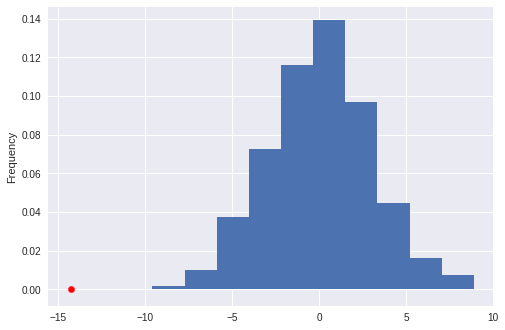

In [39]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_pm25 = (
    pm25_and_lockdown['pm25']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (pm25_and_lockdown.assign(**{'shuffled_pm25': shuffled_pm25}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_pm25'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [40]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [41]:
from scipy.stats import ks_2samp
gp1 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==True, 'pm25']
gp2 = pm25_and_lockdown.loc[pm25_and_lockdown.lockdown==False, 'pm25']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.3104166666666666, pvalue=0.0002269265901764143)

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

#### Permutation Test for O3:

In [42]:
o3_and_lockdown = dfaqi2[['o3', 'lockdown']]
o3_and_lockdown = o3_and_lockdown.replace(0, np.nan)
o3_and_lockdown = o3_and_lockdown.dropna()

obs_diff = (o3_and_lockdown.groupby('lockdown')['o3'].mean().diff().iloc[-1])
obs_diff

1.2823383084577102

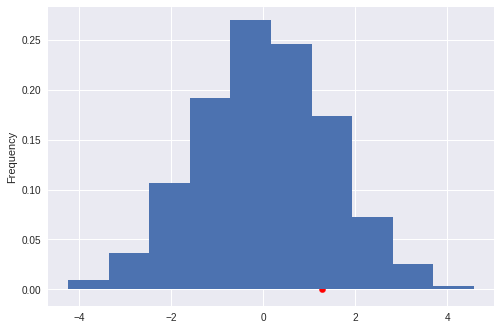

In [43]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_o3 = (
    o3_and_lockdown['o3']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (o3_and_lockdown.assign(**{'shuffled_o3': shuffled_o3}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_o3'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [44]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.81

In [45]:
gp1 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==True, 'o3']
gp2 = o3_and_lockdown.loc[o3_and_lockdown.lockdown==False, 'o3']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.1695200468247, pvalue=0.11388071203868114)

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

#### Permutation Test for NO2:

In [46]:
no2_and_lockdown = dfaqi2[['no2', 'lockdown']]
no2_and_lockdown = no2_and_lockdown.replace(0, np.nan)
no2_and_lockdown = no2_and_lockdown.dropna()

obs_diff = (no2_and_lockdown.groupby('lockdown')['no2'].mean().diff().iloc[-1])
obs_diff

-7.29526245280721

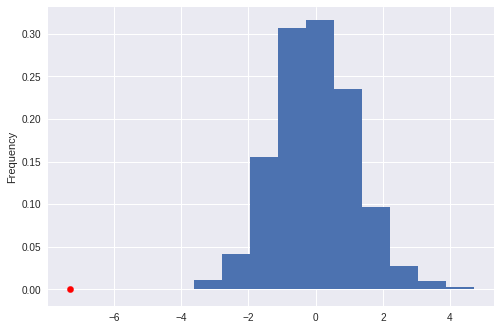

In [47]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_no2 = (
    no2_and_lockdown['no2']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (no2_and_lockdown.assign(**{'shuffled_no2': shuffled_no2}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_no2'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [48]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [49]:
gp1 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==True, 'no2']
gp2 = no2_and_lockdown.loc[no2_and_lockdown.lockdown==False, 'no2']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.41439532334672996, pvalue=7.307275182512284e-08)

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

#### Permutation Test for CO:

In [50]:
co_and_lockdown = dfaqi2[['co', 'lockdown']]
co_and_lockdown = co_and_lockdown.replace(0, np.nan)
co_and_lockdown = co_and_lockdown.dropna()

obs_diff = (co_and_lockdown.groupby('lockdown')['co'].mean().diff().iloc[-1])
obs_diff

-2.9947058823529416

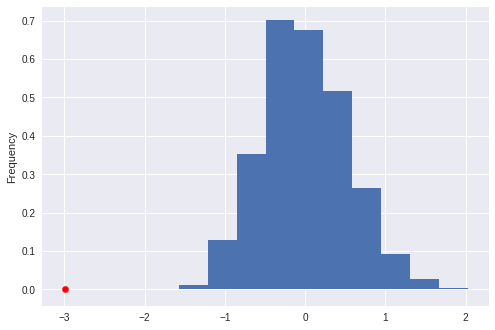

In [51]:
n_repititions = 1000
differences = []

for _ in range(n_repititions):
    shuffled_co = (
    co_and_lockdown['co']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
    )
    
    original_and_shuffled = (co_and_lockdown.assign(**{'shuffled_co': shuffled_co}))
    group_means = (original_and_shuffled.groupby('lockdown').mean().loc[:, 'shuffled_co'])
    difference = group_means.diff().iloc[-1]
    differences.append(difference)
    
pd.Series(differences).plot(kind='hist', density=True)
plt.scatter(obs_diff, 0, color='red', s=40)

In [52]:
pval = np.count_nonzero(differences<= obs_diff) / n_repititions
pval

0.0

In [53]:
gp1 = co_and_lockdown.loc[co_and_lockdown.lockdown==True, 'co']
gp2 = co_and_lockdown.loc[co_and_lockdown.lockdown==False, 'co']
ks_2samp(gp1, gp2)

Ks_2sampResult(statistic=0.5753186274509803, pvalue=9.357127042349965e-15)

!!!INTERPRETATION & WHAT SHOULD BE LEARNED FROM THIS PLOT!!!

# Ethics & Privacy

The datasets we will be using are from the *World Air Quality* and the *National Centers for Environmental Information* project websites. Both host an open data platform allowing anyone to download a csv of air quality indexes and weather measurements of locations around the world. These websites give permission to anyone to utilize the data for projects or research. There are no privacy concerns regarding our datasets as the data are purely scientific, only including pollutant and weather measurements. There is no information on humans, their private data, or any other sensitive subjects. Therefore, there is no need to clean data in a way to preserve privacy.

Regarding the collection of the data, we do not believe there are any human biases as the values are obtained through systematic tests. One potential bias, though, is that the station where the weather data are collected is not the same station where the pollutant data are collected. In addition, stations in different parts of LA County may result in different measurements for both weather and pollutant levels. However, by looking up the exact addresses of both the weather and pollutant data stations, we can see that the distance between them is only 5.6 miles, which is minimal relative to the entire county. Both stations are also located in the central downtown area, which is the most populated area of LA County and hence, is the most relevant part of the county to analyze. Therefore, we believe that the potential biases in the station locations will not drastically disrupt our analyses.

Regarding our analyses, there may be a potential bias in comparing the non-lockdown time period with the lockdown time period, as there are other factors such as governmental policies that could have affected the pollution levels in the non-lockdown time period. In this case, the difference between lockdown versus non-lockdown pollution levels would be exaggerated due to a factor other than lockdown regulations. Despite this potential bias, though, we believe that since we are comparing the lockdown time period to two years of non-lockdown time period, we have a large timeframe of comparison in which any unusual activity will most likely be minor relative to the overall pollution trend. 

# Conclusion & Discussion

From our permutation tests, we looked at the difference in means of the two groups if there was no affect by the lockdown. When comparing those values to the actual observed diffence in means from our data, we found that three out of the four pollutants showed a statistical significance in the difference of means between the counts from when LA was in lockdown versus when they weren't. This shows that being in lockdown could possibly affect the counts of the pollutants and they fall under a different distribution. The difference in means of our actual data was a lot greater that those from the simulated difference in means because in the times of lockdown, there were less pollutants for a variety of reasons. From the lockdown, many companies and factories has to close. As a consequence of this close and the discouragement of gatherings, there are less cars on the road being driven. With big industrial factories closed, and less cars being driven, the abscence of the influx of pollutants from those things could be a reason for why the counts of the pollutants recorded in this data during lock were lower.

# Team Contributions

Aaron Chen: Question, Hypothesis, Pollution Over Time Line Graphs, Ethics and Privacy

Cathleen Pena: Question, Hypothesis, Datasets, Setup, Data Cleaning, Correlation Plot, Permutation Tests, Ethics and Privacy

Ian Rebmann: Question, Background, Hypothesis, Weather Over Time Line Graphs

Sandra Villamar: Question, Background, Hypothesis, Data Cleaning, Pollution Over Years Boxplots, ANOVA Tests, Ethics and Privacy

**ADD IN OVERVIEW AND CONCLUSION